# Projeto 1 - Ciência dos Dados

Grupo: Guilherme Ricchetti Carvalho, Keiya Nishio, Lucas Gabriel Mocellin Teixeira e Matheus Marques Venturi.


Turma: C

### Importando bibliotecas

In [281]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Proposta

Classificar a comestibilidade (comestível ou venenoso) de um cogumelo com base em características morfológicas e ecológicas.

Dataset disponível no seguinte link: https://www.kaggle.com/uciml/mushroom-classification

# Carregando Dados

In [282]:
import os

filename = 'mushrooms.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo mushrooms.csv, tudo certo para prosseguir com o projeto!


In [283]:
dataset=pd.read_csv(filename)
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Legenda para o dataset:

• cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

• cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

• cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

• bruises: bruises=t,no=f

• odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

• gill-attachment: attached=a,descending=d,free=f,notched=n

• gill-spacing: close=c,crowded=w,distant=d

• gill-size: broad=b,narrow=n

• gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

• stalk-shape: enlarging=e,tapering=t

• stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

• stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

• stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

• stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

• stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

• veil-type: partial=p,universal=u

• veil-color: brown=n,orange=o,white=w,yellow=y

• ring-number: none=n,one=o,two=t

• ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

• spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

• population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

• habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [284]:
#dataset=dataset.dropna()  # Remover linhas com colunas vazias (NaN)  -- não precisou

In [285]:
train, test = train_test_split(dataset, test_size=0.25, random_state=1)  # separar dataset em treinamento e teste

Separando a base de treinamento em duas (cogumelos venenosos e cogumelos comestíveis):

In [286]:
venenoso=train.loc[train['class']=='p', :]
comestível=train.loc[train['class']=='e', :]

# Análise Exploratória dos Dados

Seção destinada à produção de gráficos e tabelas que comparam as features (variáveis independentes) com a target (variável dependente = comestibilidade).

Os gráficos e as tabelas permitirão determinar quais características dos cogumelos são mais relevantes para realizar a classificação.

### Renomeando as Caracetrísticas para Português

In [287]:
train = train.rename(columns = 
                     {'cap-shape': 'formato-chapéu', 
                      'cap-surface': 'superfície-chapéu',
                      'cap-color': 'cor-chapéu',
                      'bruises': 'hematomas',
                      'odor': 'odor',
                      'gill-attachment': 'ligação-lamela',
                      'gill-spacing': 'espaçamento-lamela',
                      'gill-size': 'tamanho-lamela',
                      'gill-color': 'cor-lamela',
                      'stalk-shape': 'formato-estipe',
                      'stalk-root': 'raiz-estipe',
                      'stalk-surface-above-ring': 'superfície-estipe-sobre-anel',
                      'stalk-surface-below-ring': 'superfície-estipe-sob-anel',
                      'stalk-color-above-ring': 'cor-estipe-sobre-anel',
                      'stalk-color-below-ring': 'cor-estipe-sob-anel',
                      'veil-type': 'tipo-volva',
                      'veil-color': 'cor-volva',
                      'ring-number': 'quantidade-anéis',
                      'ring-type': 'tipo-anel',
                      'spore-print-color': 'cor-impressão-esporo',
                      'population': 'população',
                      'habitat': 'habitat'}, inplace = False)

In [291]:
train['ligação-lamela']=train['ligação-lamela'].astype('category')
train['ligação-lamela'].cat.categories = ['conectada', 'solta']

train['espaçamento-lamela']=train['espaçamento-lamela'].astype('category')
train['espaçamento-lamela'].cat.categories = ['perto', 'lotado']

train['tamanho-lamela']=train['tamanho-lamela'].astype('category')
train['tamanho-lamela'].cat.categories = ['ampla', 'estreita']

train['cor-lamela']=train['cor-lamela'].astype('category')
train['cor-lamela'].cat.categories = ['couro', 'vermelha', 'cinza', 'chocolate', 'preta', 'marrom', 'laranja', 'rosa', 'verde', 'roxa', 'branca', 'amarelo']

train['formato-estipe']=train['formato-estipe'].astype('category')
train['formato-estipe'].cat.categories = ['alargando', 'afunilando']

train['tipo-volva']=train['tipo-volva'].astype('category')
train['tipo-volva'].cat.categories = ['parcial']

train['cor-volva']=train['cor-volva'].astype('category')
train['cor-volva'].cat.categories = ['marrom' , 'laranja', 'branco', 'amarelo']

train['quantidade-anéis']=train['quantidade-anéis'].astype('category')
train['quantidade-anéis'].cat.categories = ['nenhum' , 'um', 'dois']

train['tipo-anel']=train['tipo-anel'].astype('category')
train['tipo-anel'].cat.categories = ['evanescente', 'deslumbrante', 'grande', 'nenhum', 'pingente']

train['cor-impressão-esporo']=train['cor-impressão-esporo'].astype('category')
train['cor-impressão-esporo'].cat.categories = ['couro', 'chocolate', 'preto', 'marrom', 'laranja', 'verde', 'roxo', 'branco', 'amarelo']


In [293]:
'''
train[‘raiz-estipe’]=train[‘raiz-estipe’].astype(‘category’)

train[‘raiz-estipe’].cat.categories = [‘bulboso’, ‘clava’, ‘reto’, ‘enraizado’, ‘rizomorfo’, ‘não tem’]







train[‘superficie-estipe-sobre-anel’]=train[‘superficie-estipe-sobre-anel’].astype(‘category’)

train[‘superficie-estipe-sobre-anel’].cat.categories = [‘fibroso’, ‘sedoso’, ‘liso’, ‘escamoso’]







train[‘superficie-estipe-sob-anel’]=train[‘superficie-estipe-sob-anel’].astype(‘category’)

train[‘superficie-estipe-sob-anel’].cat.categories = [‘fibroso’, ‘sedoso’, ‘liso’, ‘escamoso’]







train[‘cor-estipe-sobre-anel’]=train[‘cor-estipe-sobre-anel’].astype(‘category’)

train[‘cor-estipe-sobre-anel’].cat.categories = [‘couro’, ‘canela’, ‘vermelho’, ‘cinza’, ‘marrom’, ‘laranja’, ‘branco’, ‘amarelo’]







train[‘cor-estipe-sob-anel’]=train[‘cor-estipe-sob-anel’].astype(‘category’)

train[‘cor-estipe-sob-anel’]. cat.categories = [‘couro’, ‘canela’, ‘vermelho’, ‘cinza’, ‘marrom’, ‘laranja’, ‘branco’, ‘amarelo’]'''

'\ntrain[‘raiz-estipe’]=train[‘raiz-estipe’].astype(‘category’)\n\ntrain[‘raiz-estipe’].cat.categories = [‘bulboso’, ‘clava’, ‘reto’, ‘enraizado’, ‘rizomorfo’, ‘não tem’]\n\n\n\n\n\n\n\ntrain[‘superficie-estipe-sobre-anel’]=train[‘superficie-estipe-sobre-anel’].astype(‘category’)\n\ntrain[‘superficie-estipe-sobre-anel’].cat.categories = [‘fibroso’, ‘sedoso’, ‘liso’, ‘escamoso’]\n\n\n\n\n\n\n\ntrain[‘superficie-estipe-sob-anel’]=train[‘superficie-estipe-sob-anel’].astype(‘category’)\n\ntrain[‘superficie-estipe-sob-anel’].cat.categories = [‘fibroso’, ‘sedoso’, ‘liso’, ‘escamoso’]\n\n\n\n\n\n\n\ntrain[‘cor-estipe-sobre-anel’]=train[‘cor-estipe-sobre-anel’].astype(‘category’)\n\ntrain[‘cor-estipe-sobre-anel’].cat.categories = [‘couro’, ‘canela’, ‘vermelho’, ‘cinza’, ‘marrom’, ‘laranja’, ‘branco’, ‘amarelo’]\n\n\n\n\n\n\n\ntrain[‘cor-estipe-sob-anel’]=train[‘cor-estipe-sob-anel’].astype(‘category’)\n\ntrain[‘cor-estipe-sob-anel’]. cat.categories = [‘couro’, ‘canela’, ‘vermelho’, ‘cinza’, ‘m

In [292]:
train.head(5)

,class,formato-chapéu,superfície-chapéu,cor-chapéu,hematomas,odor,ligação-lamela,espaçamento-lamela,tamanho-lamela,cor-lamela,...,superfície-estipe-sob-anel,cor-estipe-sobre-anel,cor-estipe-sob-anel,tipo-volva,cor-volva,quantidade-anéis,tipo-anel,cor-impressão-esporo,população,habitat
6253,p,x,y,e,f,s,solta,perto,estreita,couro,...,k,p,p,parcial,branco,um,evanescente,branco,v,p
2739,e,x,y,e,t,n,solta,perto,ampla,roxa,...,s,p,w,parcial,branco,um,pingente,preto,y,d
7436,p,k,s,e,f,y,solta,perto,estreita,couro,...,k,p,w,parcial,branco,um,evanescente,branco,v,l
6339,p,x,s,e,f,f,solta,perto,estreita,couro,...,k,w,p,parcial,branco,um,evanescente,branco,v,l
4654,p,f,f,g,f,f,solta,perto,ampla,chocolate,...,k,n,p,parcial,branco,um,grande,chocolate,y,d


### Feature "Cap Shape"

#### Tabela de Frequências Relativas

In [43]:
tabela_cap_shape=pd.crosstab(train['class'], train['cap-shape'], normalize='columns')
tabela_cap_shape*100

cap-shape,b,c,f,k,s,x
class,,,,,,
e,89.425982,0.0,51.552013,27.950311,100.0,53.962403
p,10.574018,100.0,48.447987,72.049689,0.0,46.037597


#### Gráfico de Empilhamento

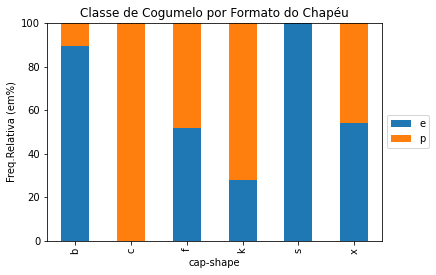

In [177]:
plot = (100*tabela_cap_shape).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Formato do Chapéu')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Odor"

#### Tabela de Frequências Relativas

In [45]:
tabela_odor=pd.crosstab(train['class'], train['odor'], normalize='columns')
tabela_odor*100

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,100.0,0.0,0.0,100.0,0.0,96.85511,0.0,0.0,0.0
p,0.0,100.0,100.0,0.0,100.0,3.14489,100.0,100.0,100.0


#### Gráfico de Empilhamento

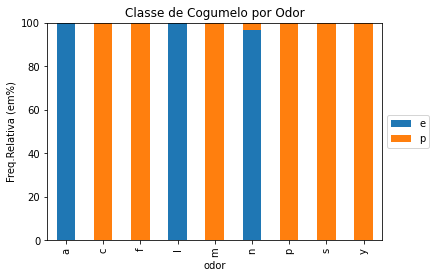

In [176]:
plot = (100*tabela_odor).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Odor')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Cap-Surface"

#### Tabela de Frequências

In [48]:
tabela_cap_surface=pd.crosstab(train['class'], train['cap-surface'], normalize='columns')
tabela_cap_surface*100

cap-surface,f,g,s,y
class,,,,
e,68.025258,0.0,45.263158,46.653061
p,31.974742,100.0,54.736842,53.346939


#### Gráfico de Empilhamento

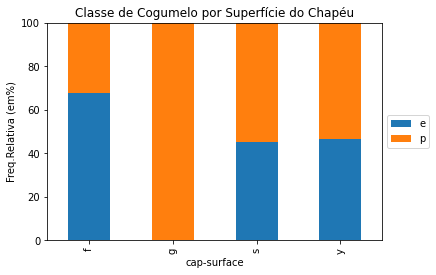

In [175]:
plot = (100*tabela_cap_surface).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Superfície do Chapéu')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Cap-Color"

#### Tabela de Frequências Relativas

In [50]:
tabela_cap_color=pd.crosstab(train['class'], train['cap-color'], normalize='columns')
tabela_cap_color*100

cap-color,b,c,e,g,n,p,r,u,w,y
class,,,,,,,,,,
e,25.619835,80.0,41.239892,56.200717,56.079116,37.614679,100.0,100.0,70.988447,38.095238
p,74.380165,20.0,58.760108,43.799283,43.920884,62.385321,0.0,0.0,29.011553,61.904762


#### Gráfico de Empilhamento

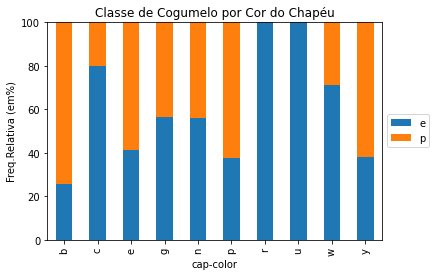

In [174]:
plot = (100*tabela_cap_color).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Cor do Chapéu')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Bruises"

#### Tabela de Frequências Relativas

In [53]:
tabela_bruises=pd.crosstab(train['class'], train['bruises'], normalize='columns')
tabela_bruises*100

bruises,f,t
class,,
e,31.302876,81.58618
p,68.697124,18.41382


#### Gráfico de Empilhamento

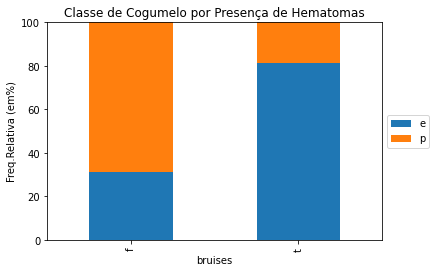

In [173]:
plot = (100*tabela_bruises).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Presença de Hematomas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Gill-Attachment"

#### Tabela de Frequências

In [56]:
tabela_gill_attachment=pd.crosstab(train['class'], train['gill-attachment'], normalize='columns')
tabela_gill_attachment*100

gill-attachment,a,f
class,,
e,90.789474,51.338159
p,9.210526,48.661841


#### Gráfico de Empilhamento

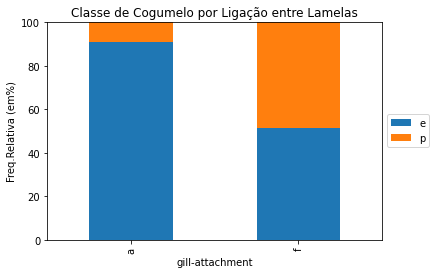

In [172]:
plot = (100*tabela_gill_attachment).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Ligação entre Lamelas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Gill-Spacing"

In [59]:
tabela_gill_spacing=pd.crosstab(train['class'], train['gill-spacing'], normalize='columns')
tabela_gill_spacing*100

gill-spacing,c,w
class,,
e,44.381027,92.193676
p,55.618973,7.806324


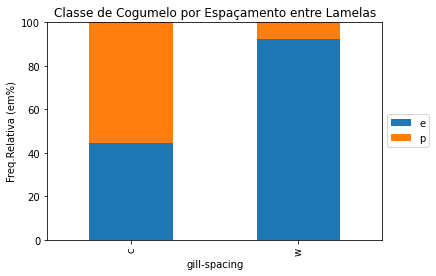

In [171]:
plot = (100*tabela_gill_spacing).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Espaçamento entre Lamelas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Gill-Size"

#### Tabela de Frequência

In [61]:
tabela_gill_size=pd.crosstab(train['class'], train['gill-size'], normalize='columns')
tabela_gill_size*100

gill-size,b,n
class,,
e,70.135424,12.526539
p,29.864576,87.473461


#### Gráfico de Empilhamento

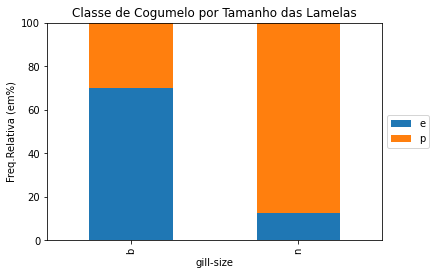

In [170]:
plot = (100*tabela_gill_size).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Tamanho das Lamelas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Gill-Color"

#### Tabela de Frequência

In [65]:
tabela_gill_color=pd.crosstab(train['class'], train['gill-color'], normalize='columns')
tabela_gill_color*100

gill-color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
e,0.0,100.0,32.675045,28.597786,84.161491,89.367089,100.0,57.425743,0.0,90.05102,79.646018,73.4375
p,100.0,0.0,67.324955,71.402214,15.838509,10.632911,0.0,42.574257,100.0,9.94898,20.353982,26.5625


#### Gráfico de Empilhamento

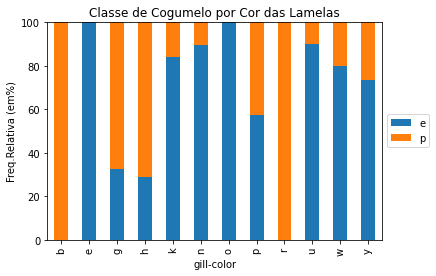

In [169]:
plot = (100*tabela_gill_color).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Cor das Lamelas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Stalk-Shape"

#### Tabela de Frequências Relativas

In [67]:
tabela_stalk_shape=pd.crosstab(train['class'], train['stalk-shape'], normalize='columns')
tabela_stalk_shape*100

stalk-shape,e,t
class,,
e,46.08067,57.056277
p,53.91933,42.943723


#### Gráfico de Empilhamento

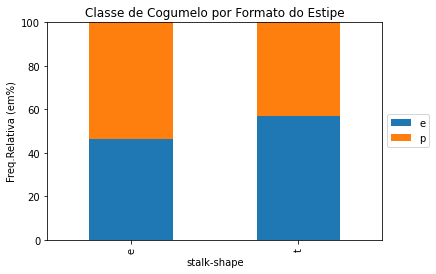

In [168]:
plot = (100*tabela_stalk_shape).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Formato do Estipe')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Stalk-Root"

#### Tabela de Frequências Relativas

In [69]:
tabela_stalk_root=pd.crosstab(train['class'], train['stalk-root'], normalize='columns')
tabela_stalk_root*100

stalk-root,?,b,c,e,r
class,,,,,
e,29.395754,51.822004,91.990291,76.498237,100.0
p,70.604246,48.177996,8.009709,23.501763,0.0


#### Gráfico de Empilhamento

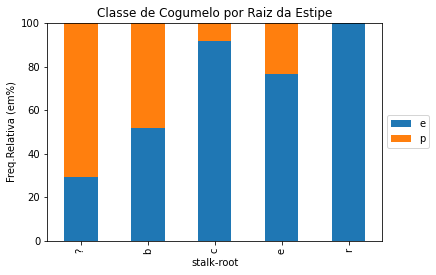

In [167]:
plot = (100*tabela_stalk_root).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Raiz da Estipe')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Stalk Surface Above Ring"

#### Tabela de Frequências Relativas

In [72]:
tabela_stalk_surface_above_ring=pd.crosstab(train['class'], train['stalk-surface-above-ring'], normalize='columns')
tabela_stalk_surface_above_ring*100

stalk-surface-above-ring,f,k,s,y
class,,,,
e,75.18797,6.38779,70.719222,66.666667
p,24.81203,93.61221,29.280778,33.333333


#### Gráfico de Empilhamento

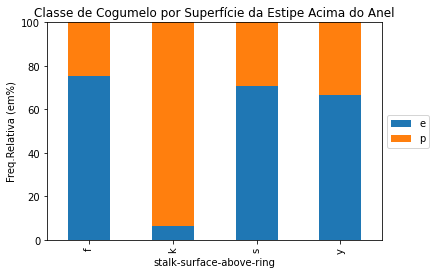

In [188]:
plot = (100*tabela_stalk_surface_above_ring).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Superfície da Estipe Acima do Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Stalk Surface Below Ring"

#### Tabela de Frequências Relativas

In [109]:
tabela_stalk_surface_below_ring=pd.crosstab(train['class'], train['stalk-surface-below-ring'], normalize='columns')
tabela_stalk_surface_below_ring*100

stalk-surface-below-ring,f,k,s,y
class,,,,
e,77.097506,6.795548,69.029152,73.300971
p,22.902494,93.204452,30.970848,26.699029


#### Gráfico de Empilhamento

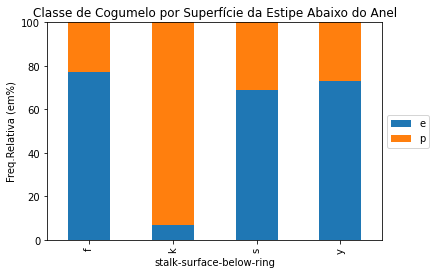

In [187]:
plot = (100*tabela_stalk_surface_below_ring).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Superfície da Estipe Abaixo do Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Stalk Color Above Ring"

#### Tabela de Frequências Relativas

In [79]:
tabela_stalk_color_above_ring=pd.crosstab(train['class'], train['stalk-color-above-ring'], normalize='columns')
tabela_stalk_color_above_ring*100

stalk-color-above-ring,b,c,e,g,n,o,p,w,y
class,,,,,,,,,
e,0.0,0.0,100.0,100.0,3.571429,100.0,31.537356,62.352246,0.0
p,100.0,100.0,0.0,0.0,96.428571,0.0,68.462644,37.647754,100.0


#### Gráfico de Empilhamento

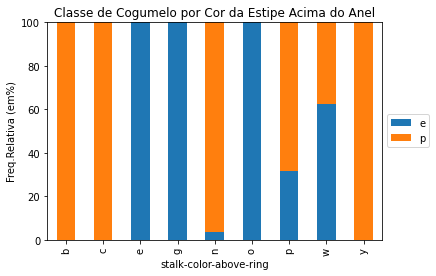

In [186]:
plot = (100*tabela_stalk_color_above_ring).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Cor da Estipe Acima do Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Stalk Color Below Ring"

#### Tabela de Frequências Relativas

In [82]:
tabela_stalk_color_below_ring=pd.crosstab(train['class'], train['stalk-color-below-ring'], normalize='columns')
tabela_stalk_color_below_ring*100

stalk-color-below-ring,b,c,e,g,n,o,p,w,y
class,,,,,,,,,
e,0.0,0.0,100.0,100.0,14.322917,100.0,30.606282,62.180835,0.0
p,100.0,100.0,0.0,0.0,85.677083,0.0,69.393718,37.819165,100.0


#### Gráfico de Empilhamento

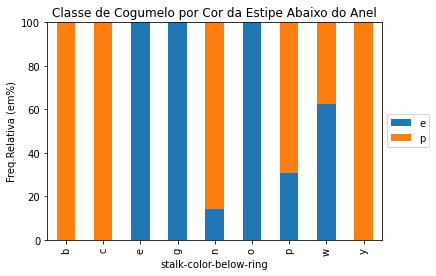

In [185]:
plot = (100*tabela_stalk_color_below_ring).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Cor da Estipe Abaixo do Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Veil Type"

#### Tabela de Frequências Relativas

In [85]:
tabela_veil_type=pd.crosstab(train['class'], train['veil-type'], normalize='columns')
tabela_veil_type*100

veil-type,p
class,
e,52.322337
p,47.677663


#### Gráfico de Empilhamento

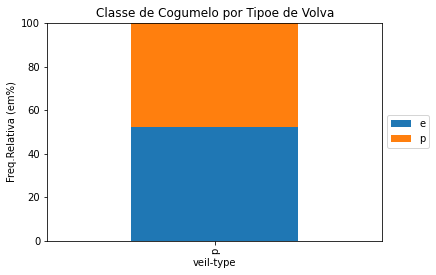

In [184]:
plot = (100*tabela_veil_type).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Tipoe de Volva')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Veil Color"

#### Tabela de Frequências Relativas

In [87]:
tabela_veil_color=pd.crosstab(train['class'], train['veil-color'], normalize='columns')
tabela_veil_color*100

veil-color,n,o,w,y
class,,,,
e,100.0,100.0,51.269121,0.0
p,0.0,0.0,48.730879,100.0


#### Gráfico de Empilhamento

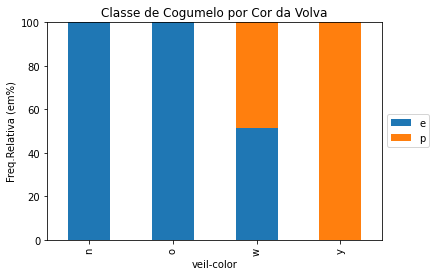

In [183]:
plot = (100*tabela_veil_color).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Cor da Volva')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Ring Number"

#### Tabela de Frequências Relativas

In [89]:
tabela_ring_number=pd.crosstab(train['class'], train['ring-number'], normalize='columns')
tabela_ring_number*100

ring-number,n,o,t
class,,,
e,0.0,49.652468,88.351648
p,100.0,50.347532,11.648352


#### Gráfico de Empilhamento

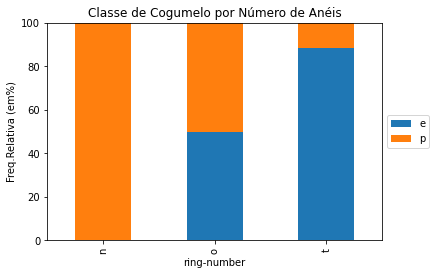

In [182]:
plot = (100*tabela_ring_number).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Número de Anéis')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Ring Type"

#### Tabela de Frequências Relativas

In [91]:
tabela_ring_type=pd.crosstab(train['class'], train['ring-type'], normalize='columns')
tabela_ring_type*100

ring-type,e,f,l,n,p
class,,,,,
e,36.747573,100.0,0.0,0.0,79.667221
p,63.252427,0.0,100.0,100.0,20.332779


#### Gráfico de Empilhamento

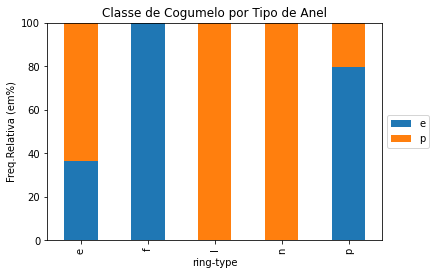

In [181]:
plot = (100*tabela_ring_type).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Tipo de Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Spore-Print-Color"

#### Tabela de Frequências Relativas

In [93]:
tabela_spore_print_color=pd.crosstab(train['class'], train['spore-print-color'], normalize='columns')
tabela_spore_print_color*100

spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
e,100.0,3.047776,87.951807,88.47185,100.0,0.0,100.0,25.028121,100.0
p,0.0,96.952224,12.048193,11.52815,0.0,100.0,0.0,74.971879,0.0


#### Gráfico de Empilhamento

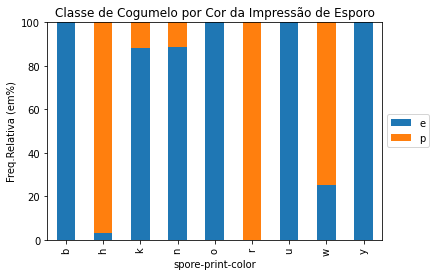

In [180]:
plot = (100*tabela_spore_print_color).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Cor da Impressão de Esporo')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Population"

#### Tabela de Frequências Relativas

In [95]:
tabela_population=pd.crosstab(train['class'], train['population'], normalize='columns')
tabela_population*100

population,a,c,n,s,v,y
class,,,,,,
e,100.0,84.810127,100.0,69.935345,30.971129,61.971831
p,0.0,15.189873,0.0,30.064655,69.028871,38.028169


#### Gráfico de Empilhamento

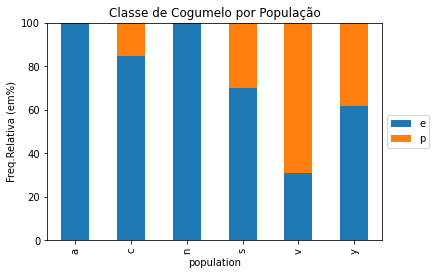

In [179]:
plot = (100*tabela_population).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por População')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Feature "Habitat"

#### Tabela de Frequências Relativas

In [97]:
tabela_habitat=pd.crosstab(train['class'], train['habitat'], normalize='columns')
tabela_habitat*100

habitat,d,g,l,m,p,u,w
class,,,,,,,
e,60.801688,65.292308,29.623568,88.288288,11.695906,26.642336,100.0
p,39.198312,34.707692,70.376432,11.711712,88.304094,73.357664,0.0


#### Gráfico de Empilhamento

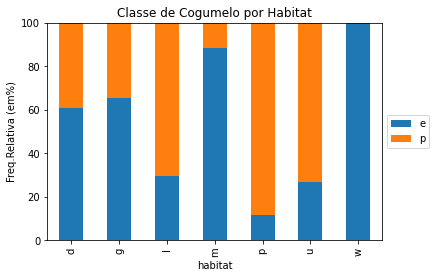

In [178]:
plot = (100*tabela_habitat).T.plot(kind='bar', stacked=True,title='Classe de Cogumelo por Habitat')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()